# Evaluation of data collected with SRWA and hidden instances w.r.t. Johnson SB distribution

We tested SRWA with 

* 10 hidden solution instances with 50 variables, and
* 10 hidden solution instances with 100 variables.

The concrete instances can be seen below.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Preliminaries

In [2]:
#
# Load all necessary modules
#

# Module for "Unix style pathname pattern expansion" 
# and "Miscellaneous operating system interfaces"
import glob
import os

# Modules for data analysis, plotting, etc.
import pandas as pd
import numpy as np
from scipy.stats import probplot
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

# Load our own modules for analysis of ecdfs, survival functions, 
# confidence intervals, etc. and the respective plotting. 
# The corresponding files can be found in ./evaluation_SB/jupyter.
from empirical import *
from plots import *

In [3]:
# Specify the base path of this experiment series.
# The base path is refined by folders incidating the number of variables.
# For SRWA + hidden instances, we used instances with n \in {50, 100} variables.
path = '../../experiments/csvs_hidden_solution'
filters = ['n50', 'n100']

In [4]:
# List all instances under consideration.
instances = []
for filter in filters:
    instances += glob.glob(os.path.join(path, f'*{filter}*.csv'))

instances

['../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed440213416.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed3184935164.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed2746317214.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed1051802513.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed107420370.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed478163328.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed3163119786.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed599310826.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed958682847.csv',
 '../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed1181241944.csv',
 '../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed2342331445.csv',
 '../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed2536146026.csv',
 '../../experiments/csvs_hidden

## Visual inspection

In this section, we are going to inspect the data in a visual manner.

A detailed description can be found in the paper. For easier reference, we next provide a short guide.


### log-plot ecdf vs. cdf; ecdf vs. cdf; log-plot e-survival vs. survial (from left to right)

* **Left plot:** The left tail, i. e., the probabilities for very small values, can be checked visually by plotting the ecdf and fitted cdf with both axes logarithmically scaled. Thereby, the probabilities for extreme events (in this case, especially easy instances) can be measured accurately. The $x$-axis in such graphs corresponds to the time (in flips) until a solution is found, and the $y$-axis corresponds to the probability that a solution is found until that time. In red we depict the empirically collected data; blue is the fitted distribution.

* **Middle plot:** Plot of the ecdf and the fitted cdf on the same graph.

* **Right plot:** Lastly, the probabilities for particularly hard instances should also be checked. Any mistakes in this area could lead to underestimating the likelihood of encountering an exceptionally hard instance. For analyses of this type, the survival function $S$ is a useful tool; if $F$ is the cdf, $S(x) := 1 − F (x)$. Therefore, the survival function’s value $S(x)$ represents the probability that an instance is (on average) harder than $x$ in our case. If we plot the empirical survival function ($1 − \hat{F}_n (x)$) and the fitted survival function together on a graph with logarithmically scaled axes, we can easily detect errors in the right tail.

*******************************************************************************
0 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed440213416.csv
*******************************************************************************
Johnson SB parameters: a 12.90999549999409, b 3.360848508578515, location 400687.4810892405, scale 144196700.66134924
Cheng parametrization: a 400687.4810892405, b 144597388.14243847, gamma 12.90999549999409, delta 3.360848508578515


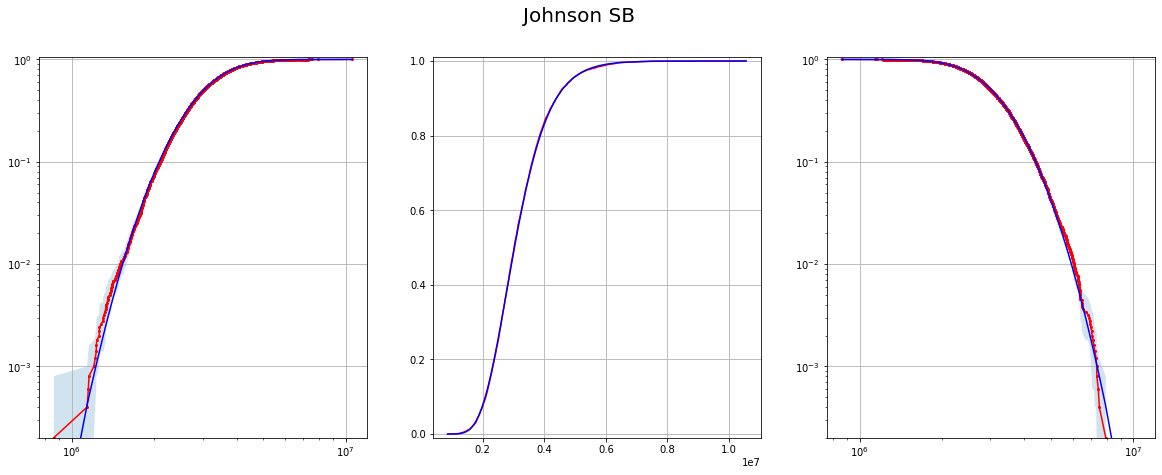



********************************************************************************
1 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed3184935164.csv
********************************************************************************
Johnson SB parameters: a 12.590551702464012, b 3.632264121350471, location 28975.51265185907, scale 2582112.883823694
Cheng parametrization: a 28975.51265185907, b 2611088.396475553, gamma 12.590551702464012, delta 3.632264121350471


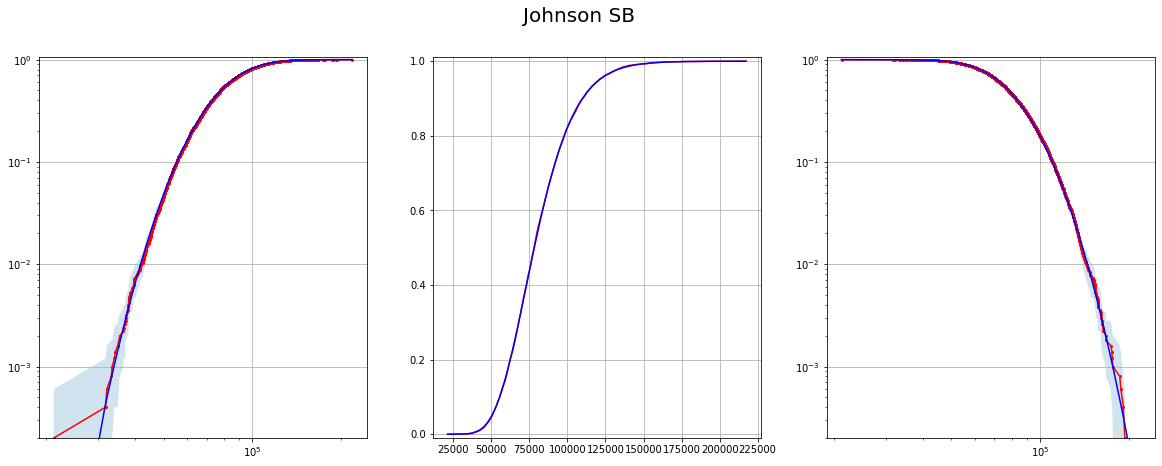



********************************************************************************
2 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed2746317214.csv
********************************************************************************
Johnson SB parameters: a 15.294176824224571, b 5.38082164862336, location 1260.789232455471, scale 74893.69199992737
Cheng parametrization: a 1260.789232455471, b 76154.48123238284, gamma 15.294176824224571, delta 5.38082164862336


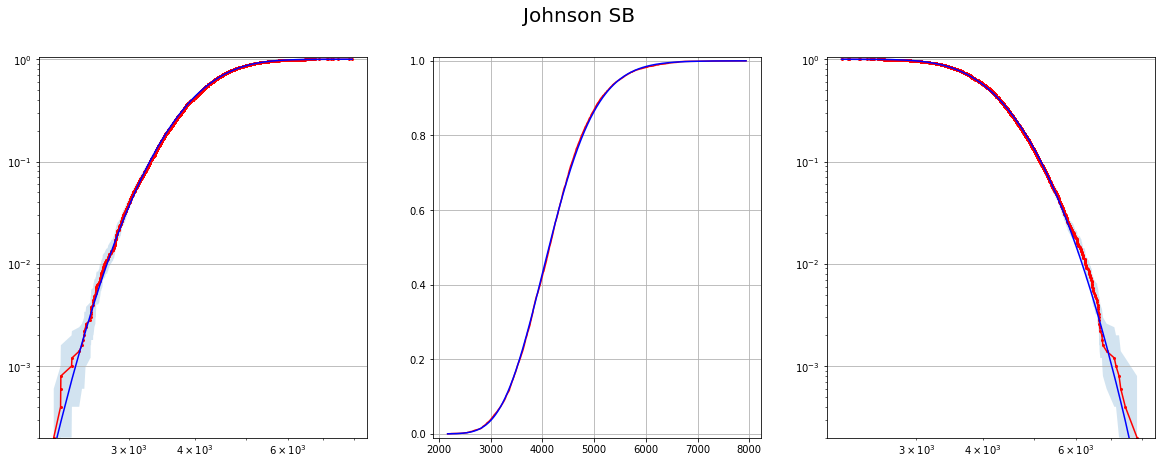



********************************************************************************
3 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed1051802513.csv
********************************************************************************
Johnson SB parameters: a 14.53253096760696, b 5.847142169353222, location 4526.310751737423, scale 338827.1129578681
Cheng parametrization: a 4526.310751737423, b 343353.42370960553, gamma 14.53253096760696, delta 5.847142169353222


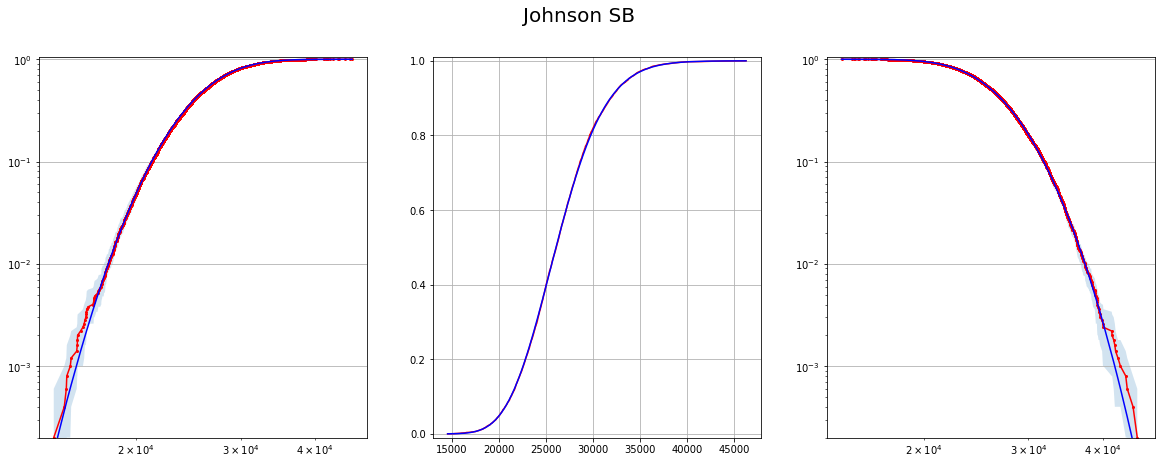



*******************************************************************************
4 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed107420370.csv
*******************************************************************************
Johnson SB parameters: a 15.373204761731671, b 5.44512894608496, location 4302.06748618318, scale 314451.3872205509
Cheng parametrization: a 4302.06748618318, b 318753.4547067341, gamma 15.373204761731671, delta 5.44512894608496


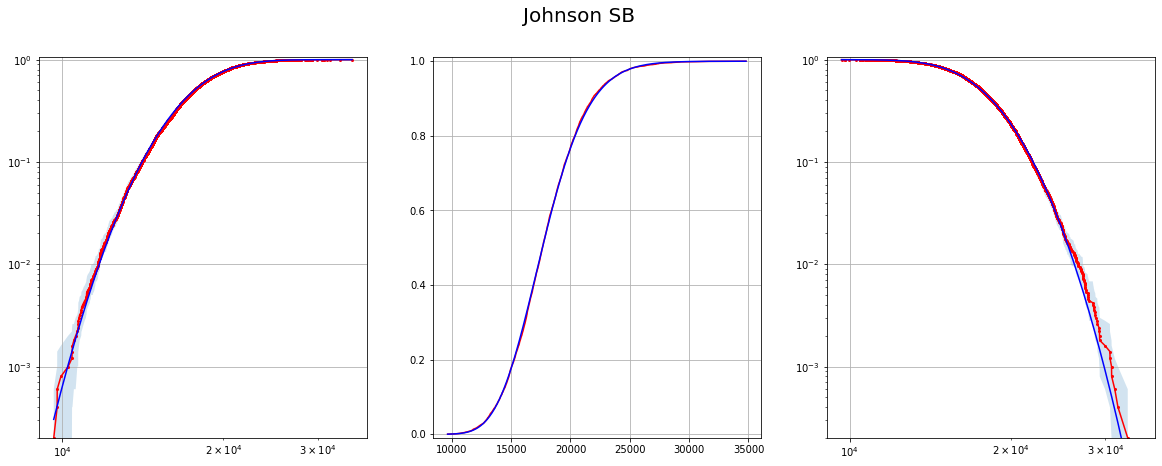



*******************************************************************************
5 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed478163328.csv
*******************************************************************************
Johnson SB parameters: a 15.430598802207143, b 7.662459461876818, location 54.96862001331743, scale 22955.065374748723
Cheng parametrization: a 54.96862001331743, b 23010.03399476204, gamma 15.430598802207143, delta 7.662459461876818


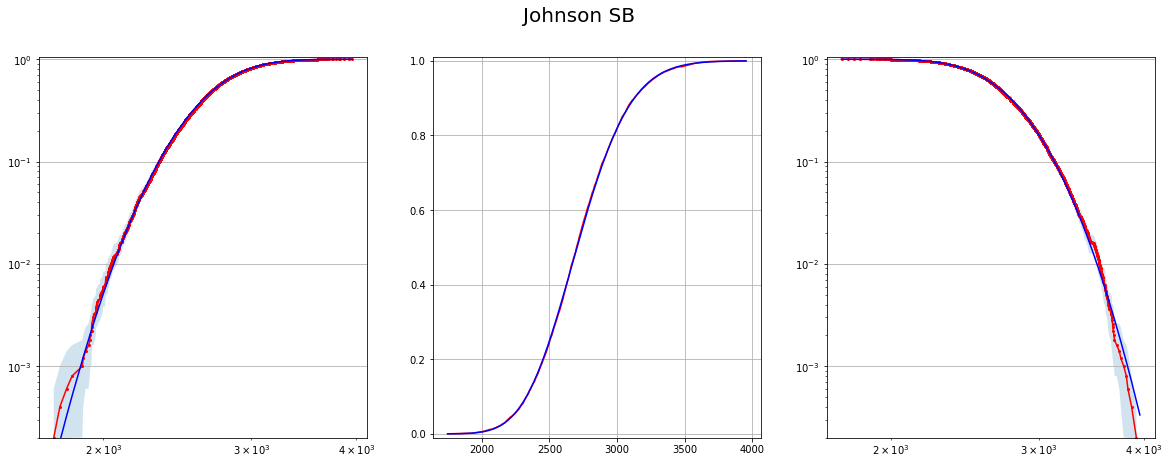



********************************************************************************
6 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed3163119786.csv
********************************************************************************
Johnson SB parameters: a 16.102270890521638, b 6.027601405165506, location 1611.060370111095, scale 185462.7682260651
Cheng parametrization: a 1611.060370111095, b 187073.82859617617, gamma 16.102270890521638, delta 6.027601405165506


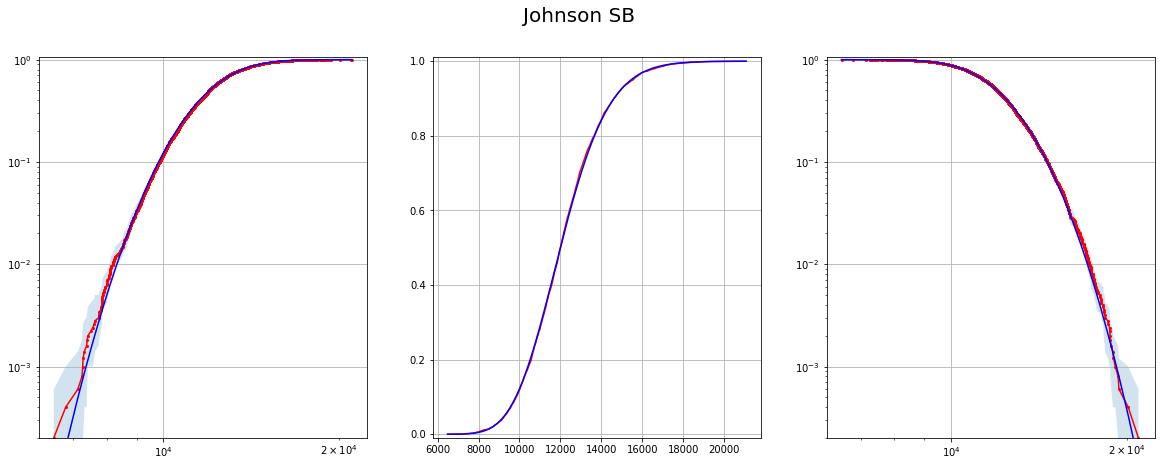



*******************************************************************************
7 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed599310826.csv
*******************************************************************************
Johnson SB parameters: a 15.415697745888838, b 5.6438972822388385, location 472.4355989104507, scale 19807.79839060658
Cheng parametrization: a 472.4355989104507, b 20280.23398951703, gamma 15.415697745888838, delta 5.6438972822388385


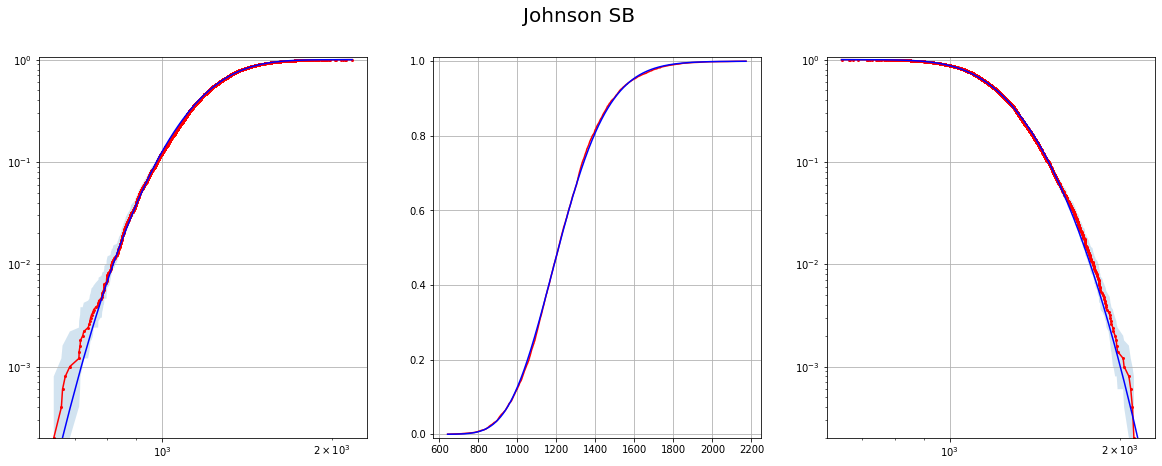



*******************************************************************************
8 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed958682847.csv
*******************************************************************************
Johnson SB parameters: a 13.759730782415744, b 3.991831503365791, location 53039.58956001914, scale 12652364.318875372
Cheng parametrization: a 53039.58956001914, b 12705403.908435391, gamma 13.759730782415744, delta 3.991831503365791


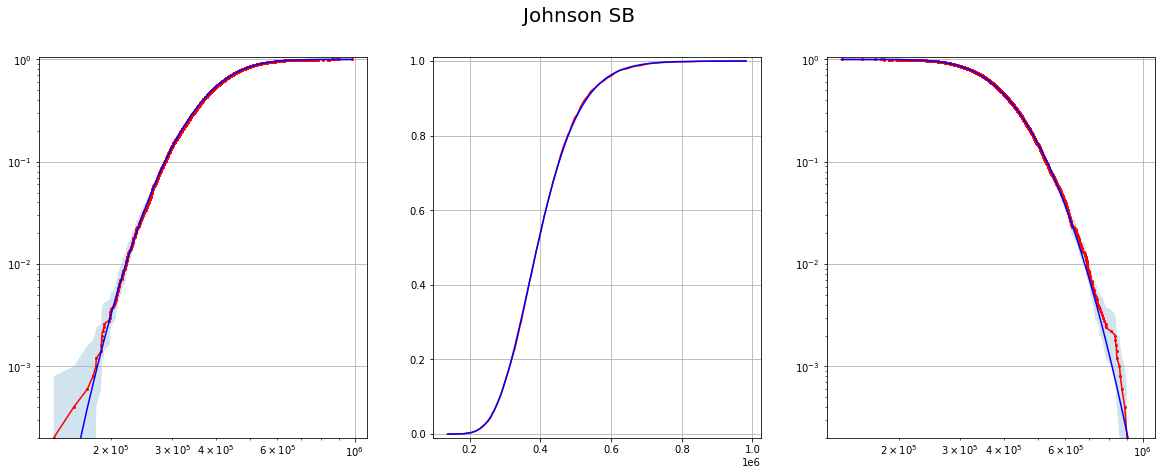



********************************************************************************
9 : ../../experiments/csvs_hidden_solution/gen_n50_m213_k3SAT_seed1181241944.csv
********************************************************************************
Johnson SB parameters: a 13.302631554097939, b 5.069615497863271, location 5265.847777002212, scale 309083.5554091858
Cheng parametrization: a 5265.847777002212, b 314349.403186188, gamma 13.302631554097939, delta 5.069615497863271


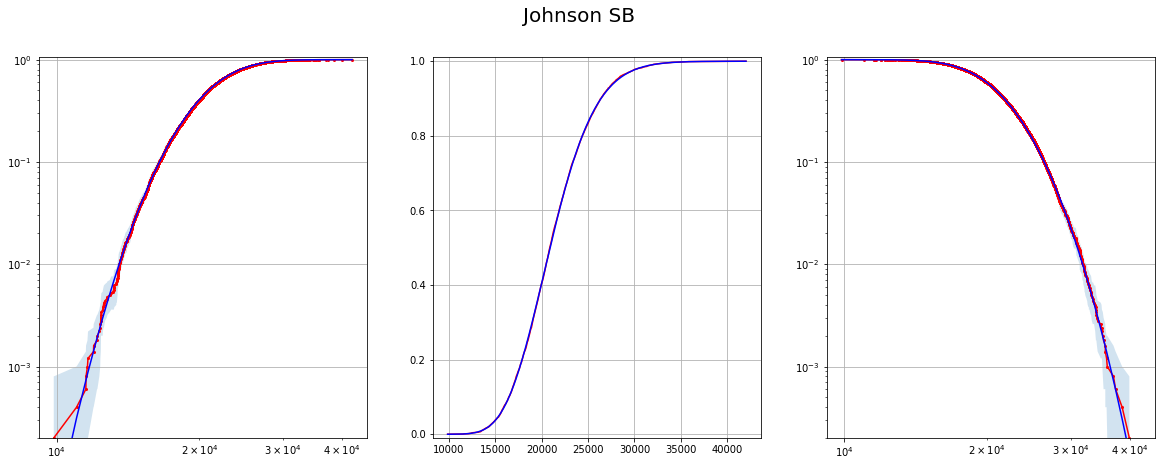



**********************************************************************************
10 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed2342331445.csv
**********************************************************************************
Johnson SB parameters: a 12.782139907741882, b 3.1219323831223944, location 111725303.37796327, scale 34490285453.1625
Cheng parametrization: a 111725303.37796327, b 34602010756.54046, gamma 12.782139907741882, delta 3.1219323831223944


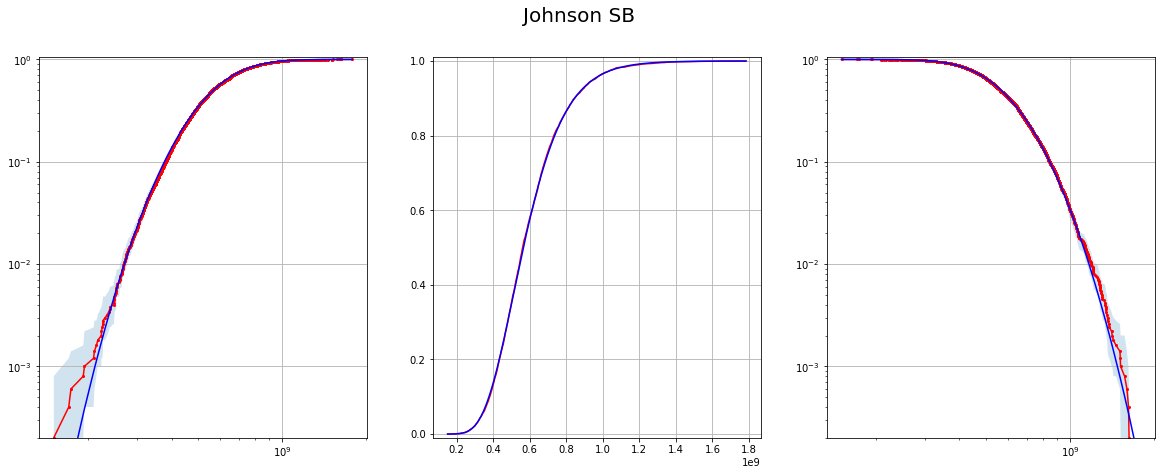



**********************************************************************************
11 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed2536146026.csv
**********************************************************************************
Johnson SB parameters: a 10.479121632621636, b 3.406964938989356, location 23905065.192574915, scale 1741813216.1661487
Cheng parametrization: a 23905065.192574915, b 1765718281.3587236, gamma 10.479121632621636, delta 3.406964938989356


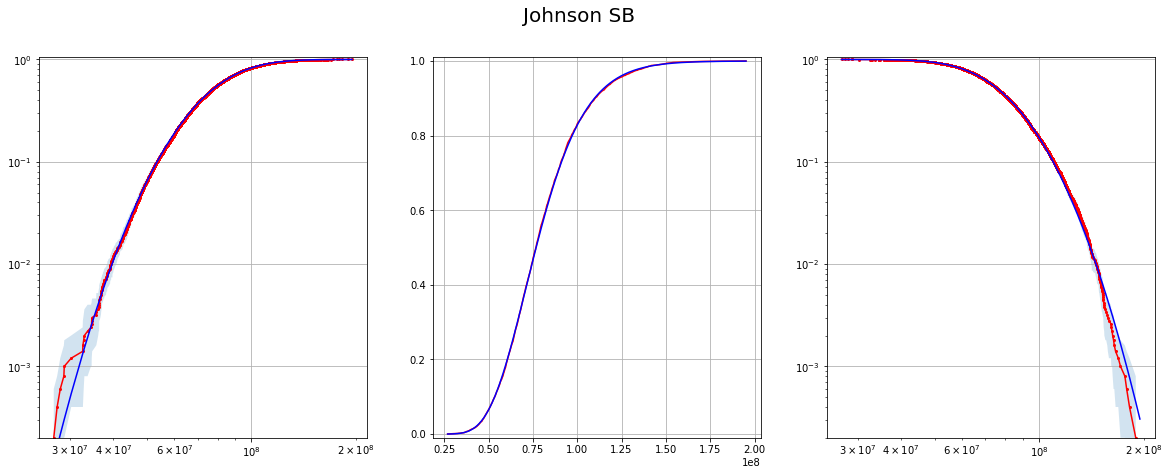



*********************************************************************************
12 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed127978095.csv
*********************************************************************************
Johnson SB parameters: a 7.614474727296782, b 3.3688877554914463, location 2060852.8733971757, scale 59581859.9162511
Cheng parametrization: a 2060852.8733971757, b 61642712.78964828, gamma 7.614474727296782, delta 3.3688877554914463


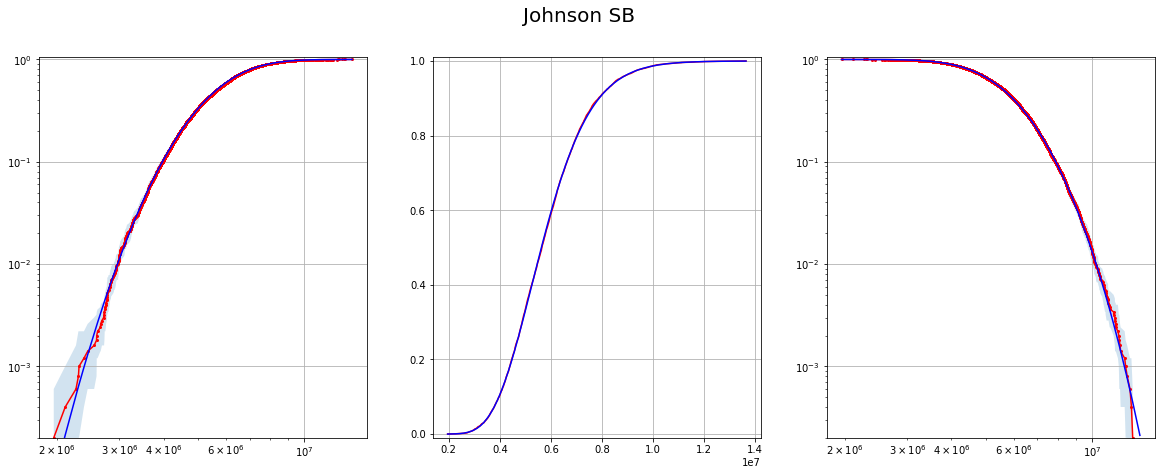



*********************************************************************************
13 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed373399427.csv
*********************************************************************************
Johnson SB parameters: a 13.655346716692588, b 5.054305388128874, location 27765856.25585317, scale 1317923450.866776
Cheng parametrization: a 27765856.25585317, b 1345689307.1226292, gamma 13.655346716692588, delta 5.054305388128874


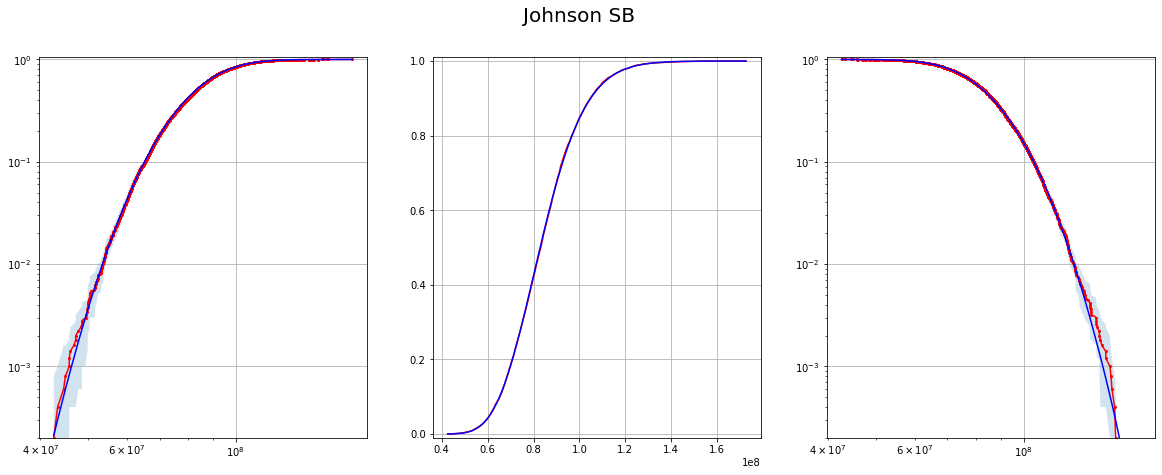



*********************************************************************************
14 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed136505588.csv
*********************************************************************************
Johnson SB parameters: a 13.788334104756576, b 3.883769435156286, location 1457463.26906346, scale 114661845.21870136
Cheng parametrization: a 1457463.26906346, b 116119308.48776482, gamma 13.788334104756576, delta 3.883769435156286


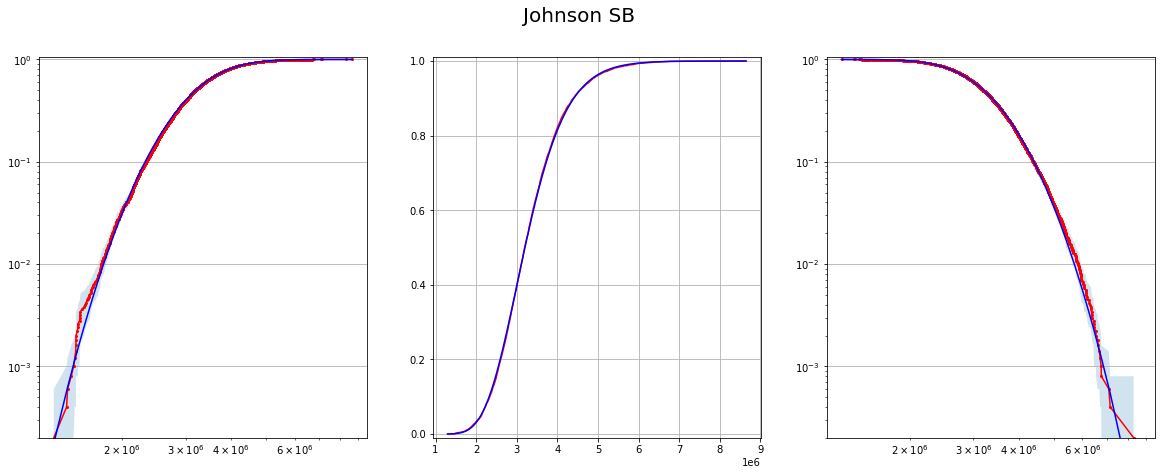



**********************************************************************************
15 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed2906402158.csv
**********************************************************************************
Johnson SB parameters: a 15.319968127823184, b 5.233663210422131, location 90974.40006281258, scale 5233735.745531771
Cheng parametrization: a 90974.40006281258, b 5324710.145594584, gamma 15.319968127823184, delta 5.233663210422131


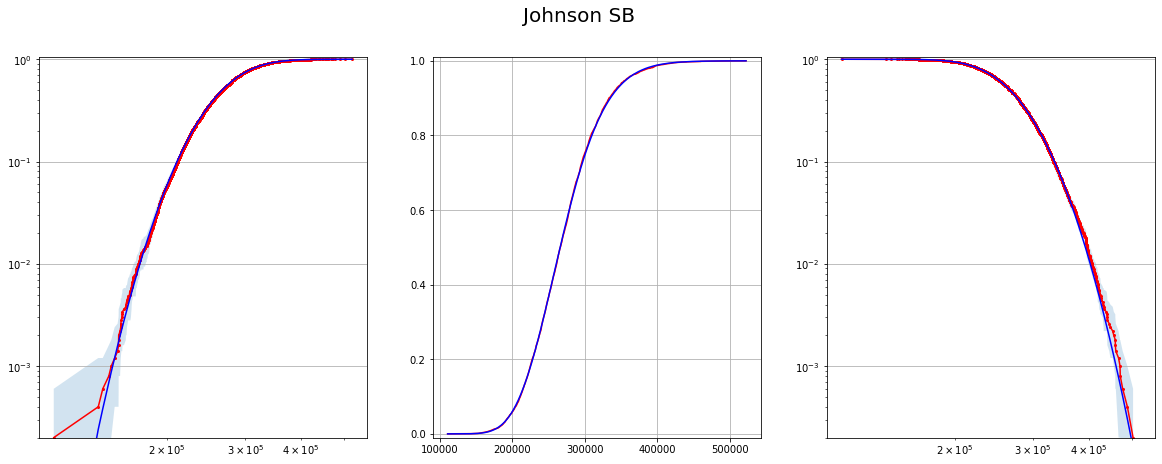



**********************************************************************************
16 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed3831882065.csv
**********************************************************************************
Johnson SB parameters: a 11.398495663560276, b 3.3156951571892783, location 8939520.829325607, scale 1009816568.6696334
Cheng parametrization: a 8939520.829325607, b 1018756089.498959, gamma 11.398495663560276, delta 3.3156951571892783


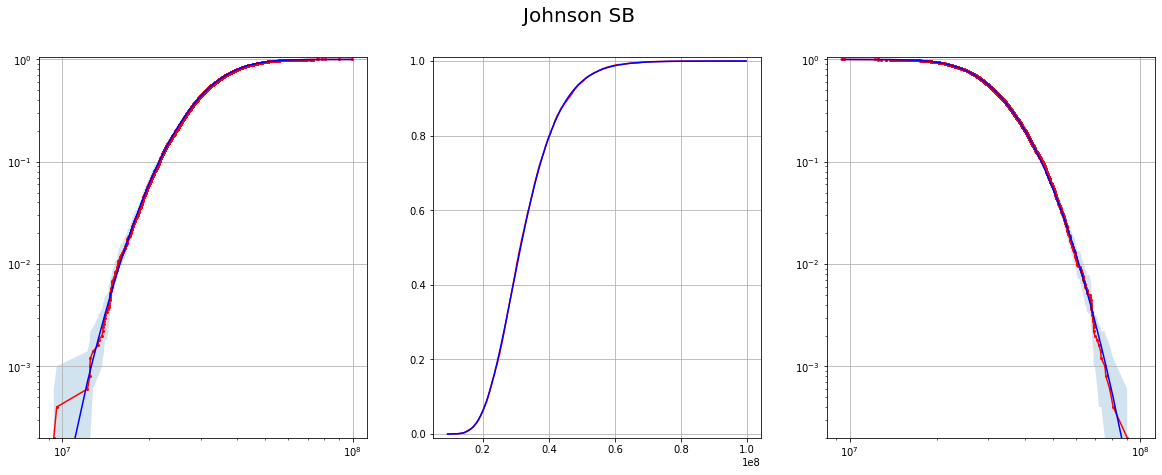



**********************************************************************************
17 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed3181143732.csv
**********************************************************************************
Johnson SB parameters: a 9.876579416229468, b 6.011225322528038, location 6.628144623776683e-06, scale 2323555.8623523125
Cheng parametrization: a 6.628144623776683e-06, b 2323555.8623589408, gamma 9.876579416229468, delta 6.011225322528038


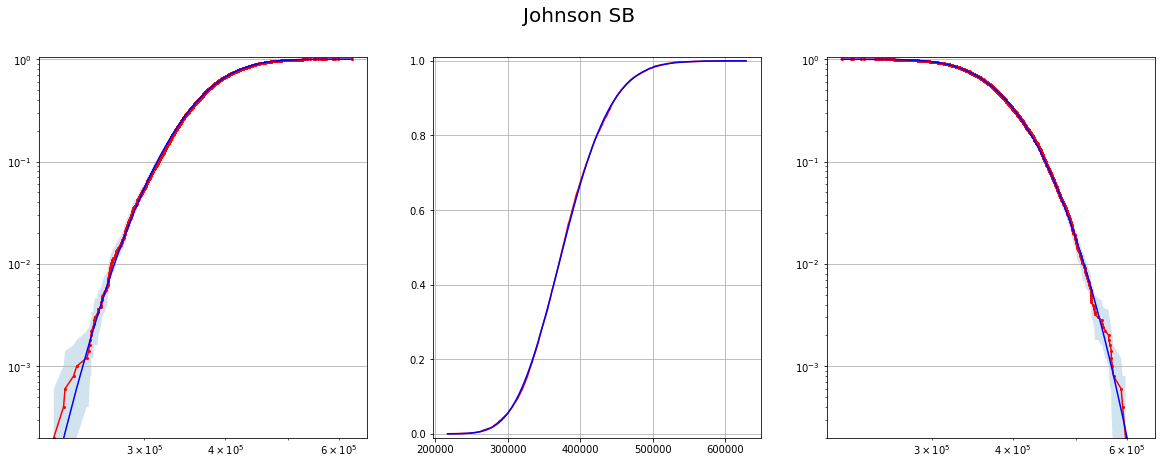



*********************************************************************************
18 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed402418011.csv
*********************************************************************************
Johnson SB parameters: a 15.790368960462231, b 5.374389152971407, location 24579800.816149294, scale 1931824003.416751
Cheng parametrization: a 24579800.816149294, b 1956403804.2329001, gamma 15.790368960462231, delta 5.374389152971407


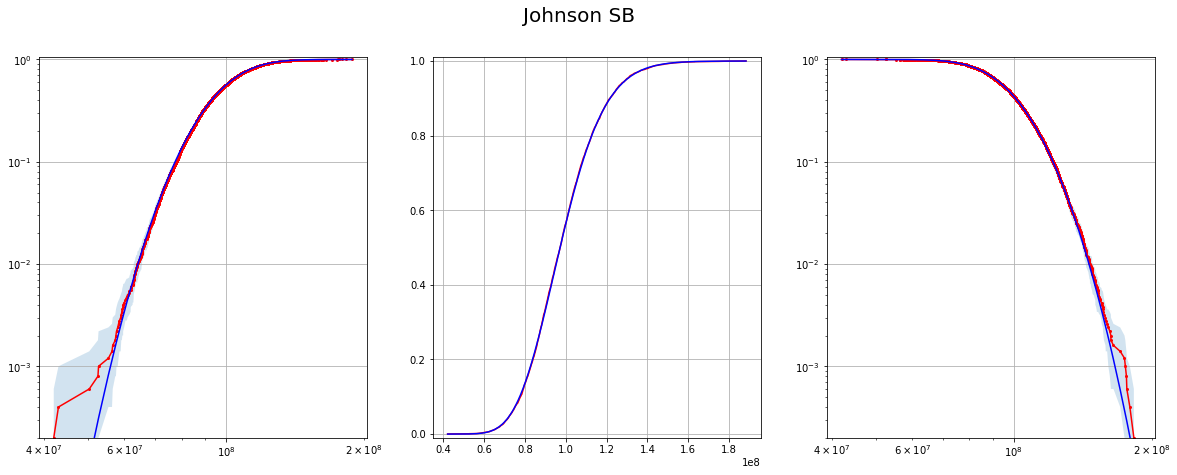



**********************************************************************************
19 : ../../experiments/csvs_hidden_solution/gen_n100_m427_k3SAT_seed1812140442.csv
**********************************************************************************
Johnson SB parameters: a 14.440936060058512, b 5.2366081412468475, location 218985.38146751653, scale 15607822.307652809
Cheng parametrization: a 218985.38146751653, b 15826807.689120326, gamma 14.440936060058512, delta 5.2366081412468475


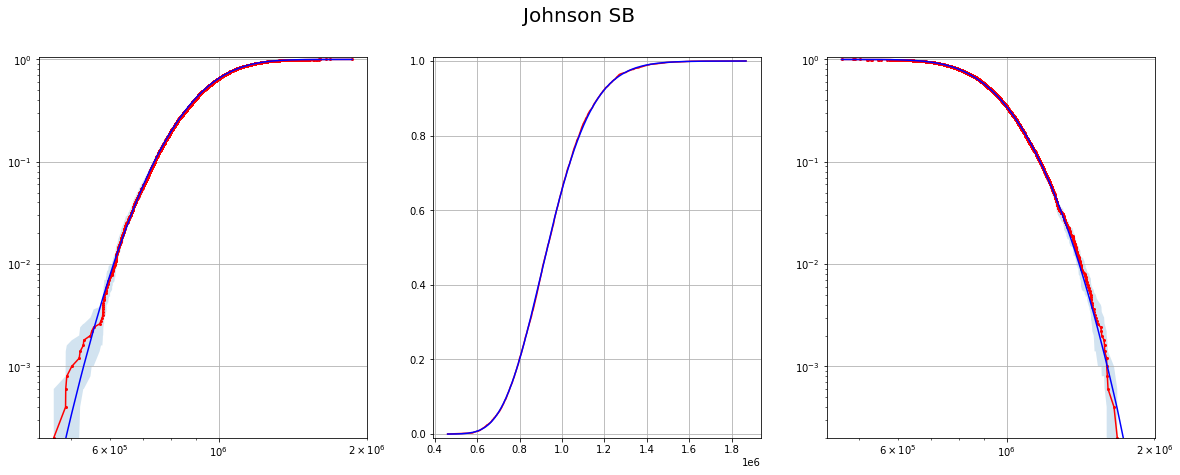

In [5]:
# Select the number of instances to interate over...
N = len(instances)

# ... and iterate over all instances to generate the plots.
for index in range(N):
    #
    # Selection of a concrete instance and name printing
    #
    name = instances[index]
    
    print("*" * (len(name) + len(str(index)) + 3))
    print(index, ":", name)
    print("*" * (len(name) + len(str(index)) + 3))   

    #
    # Manipulate the corresponding data frame:
    # We are only interested in the flip-values, not in the runtime, or seed used.
    #
    df = pd.read_csv(name, index_col=[0,1])
    df.drop(index=['seed', 'runtime'], level=1, inplace=True)

    # Checks if any values are nan.
    if df.isnull().values.any():
        print("There is a nan-value. This was not supposed to happen.")
        
    # Next, we are going to calculate $\mathsf{mean}_{S} (F^{(i)})$,
    # i.e., the mean number of flips required to solve instance $F^{(i)}$ with solver $S$.
    # This then is the hardness distribution we are going to analyze.    
    means = df.mean(axis=1)
    means = np.sort(means)  
        
    #
    # Print the plots with location parameter
    #    
    
    # Scipy can be used to fit a location parameter. 
    # In practise, however, this does not work properly.
    # Thus, we use our own method `SB_minimize_nnlf` 
    # that can be found in the `empirical` package.
    # This method must be provided with the data object `means`, 
    # a lower bound for the location parameter, here `0.0`,
    # and an upper bound for the location parameter, here `means[0]-0.0001`.
    # This method then yields a location parameter maximizing the likelihood.
    m = SB_minimize_nnlf(means, 0.0, means[0]-0.0001)
    means_SB = means - m 

    # Next, we fit a three-parametric Johnson SB distribution 
    # (with forced location parameter zero). Note that means = means - m. 
    # Note that fitting a three-parametric lognormal distribution to 
    # original_data - m is the same as fitting 
    # a four-parametric lognormal distribution to the original_data.
    # Afterwards, we can use our own location parameter.
    a, b, loc, scale = johnsonsb.fit(means_SB, floc=0) # NEW!!!

    print(f"Johnson SB parameters: a {a}, b {b}, location {m}, scale {scale}")
    print(f"Cheng parametrization: a {m}, b {scale+m}, gamma {a}, delta {b}")

    rv_SB = johnsonsb(a, b, loc, scale)
    
    plot_and_compare_cdf(means_SB, rv_SB, suptitle='Johnson SB', plot_confidence=True)

    plt.show(block=False)
    
    print("\n")

## Statistical Tests

As described in the paper, we use a statistical test to check the goodness-of-fit.

(The p-values obtained were calculated seperately and can be found in `./evaluation/evaluate_SB/all_tests.csv` for all solver and instance combinations. The reason for this is that it takes several hours to compute these values because of the bootstrapping.)

In [6]:
# Use the instance list as a selector for the correct rows in the `all_tests.csv` file.
selector = [path.split('../../experiments/')[1] for path in instances]
selector

# Extract the relevant rows from the data frame.
file = '../evaluate_SB/all_tests.csv'
df = pd.read_csv(file, index_col=False)
df = df[df['instance'].isin(selector)]

# Sort the entries to match the order of the diagrams above.
df['instance'] = pd.Categorical(
    df['instance'], 
    categories=selector, 
    ordered=True
)
df.sort_values('instance', inplace=True)

# Show the instance name without path
df['instance'] = df['instance'].map(lambda name: name.split("/")[-1].split(".csv")[0])

# Mark entries where the tests failes
stars = np.where((df['p_orig']<0.05) & (df['p_new']<0.05), 'rejected', ' ')
df.loc[:, 'rejected'] = stars.tolist()

# Add the index we used
index = list(range(len(instances)))
df['index'] = index

# Change order of columns s.th. index is the first one
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df

,index,type,instance,p_orig,p_new,rejected
186,0,SRWA,gen_n50_m213_k3SAT_seed440213416,0.996452,1.00,
188,1,SRWA,gen_n50_m213_k3SAT_seed3184935164,0.355131,0.44,
189,2,SRWA,gen_n50_m213_k3SAT_seed2746317214,0.668648,0.66,
191,3,SRWA,gen_n50_m213_k3SAT_seed1051802513,0.409306,0.37,
192,4,SRWA,gen_n50_m213_k3SAT_seed107420370,0.083058,0.09,
193,5,SRWA,gen_n50_m213_k3SAT_seed478163328,0.974485,0.96,
200,6,SRWA,gen_n50_m213_k3SAT_seed3163119786,0.067262,0.08,
202,7,SRWA,gen_n50_m213_k3SAT_seed599310826,0.440740,0.38,
203,8,SRWA,gen_n50_m213_k3SAT_seed958682847,0.119477,0.09,
204,9,SRWA,gen_n50_m213_k3SAT_seed1181241944,0.984287,0.99,
